# Description
This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load datasets
p1_whe = pd.read_csv('../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv')
p1_gen = pd.read_csv('../input/solar-power-generation-data/Plant_1_Generation_Data.csv')
p2_whe = pd.read_csv('../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv')
p2_gen = pd.read_csv('../input/solar-power-generation-data/Plant_2_Generation_Data.csv')

# Check missing value

In [3]:
p1_gen.isnull().sum() #null value cheaking in plant 1 generation data

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [4]:
p2_gen.isnull().sum() #null value cheaking in plant 2 generation data

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [5]:
p1_whe.isnull().sum() #null value cheaking in plant 1 wheather sensor data

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [6]:
p2_whe.isnull().sum() #null value cheaking in plant 2 wheather sensor data

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [7]:
p1_gen.info() #plant 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [8]:
p2_gen.info() #plant 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


# Data manipulation

In [9]:
#saperate date and time, store into new column date, time

#plant 1 power genration data 
p1_gen[['date','time']] = p1_gen['DATE_TIME'].apply(lambda x: pd.Series(str(x).split(" ")))

#plant 2 power genration data
p2_gen[['date','time']] = p2_gen['DATE_TIME'].apply(lambda x: pd.Series(str(x).split(" ")))

#plant 1 wheather sensor data
p1_whe[['Date','Time']] = p1_whe['DATE_TIME'].apply(lambda x: pd.Series(str(x).split(' ')))

#plant 2 wheather sensor data
p2_whe[['Date','Time']] = p2_whe['DATE_TIME'].apply(lambda x: pd.Series(str(x).split(' ')))

In [10]:
#drop unnecessary columns like plant id and date_time

#plant 1
p1_gen.drop(['DATE_TIME','PLANT_ID'],axis=1,inplace=True)

#plant 2
p2_gen.drop(['DATE_TIME','PLANT_ID'],axis=1,inplace=True)

In [11]:
#power generation data
#saparate day, month ,hour and minute

#plant 1
p1_gen['day'] = pd.to_datetime(p1_gen.date).dt.day 
p1_gen['month'] = pd.to_datetime(p1_gen.date).dt.month
p1_gen['hour'] = pd.to_datetime(p1_gen.time).dt.hour
p1_gen['minute'] = pd.to_datetime(p1_gen.time).dt.minute

#plant 2
p2_gen['day'] = pd.to_datetime(p2_gen.date).dt.day 
p2_gen['month'] = pd.to_datetime(p2_gen.date).dt.month
p2_gen['hour'] = pd.to_datetime(p2_gen.time).dt.hour
p2_gen['minute'] = pd.to_datetime(p2_gen.time).dt.minute

#plant 1
p1_gen.drop(['date','time'],axis=1,inplace=True)

#plant 2
p2_gen.drop(['date','time'],axis=1,inplace=True)

In [12]:
#wheather sensor data
#extract day, month, hour, minute and drop PLANT_ID, Date, Time, DATE_TIME columns

#plant 1
p1_whe['day'] = pd.to_datetime(p1_whe.Date).dt.day
p1_whe['month'] = pd.to_datetime(p1_whe.Date).dt.month
p1_whe['hour'] = pd.to_datetime(p1_whe.Time).dt.hour
p1_whe['minute'] = pd.to_datetime(p1_whe.Time).dt.minute
p1_whe.drop(['PLANT_ID','Date','Time','DATE_TIME'],axis=1,inplace=True)

#plant 2
p2_whe['day'] = pd.to_datetime(p2_whe.Date).dt.day
p2_whe['month'] = pd.to_datetime(p2_whe.Date).dt.month
p2_whe['hour'] = pd.to_datetime(p2_whe.Time).dt.hour
p2_whe['minute'] = pd.to_datetime(p2_whe.Time).dt.minute
p2_whe.drop(['PLANT_ID','Date','Time','DATE_TIME'],axis=1,inplace=True)

In [13]:
#get last five records

p1_gen.tail() #plant 1

SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  day  \
68773  uHbuxQJl8lW7ozc       0.0       0.0     5967.000    7287002.0   17   
68774  wCURE6d3bPkepu2       0.0       0.0     5147.625    7028601.0   17   
68775  z9Y9gH1T5YWrNuG       0.0       0.0     5819.000    7251204.0   17   
68776  zBIq5rxdHJRwDNY       0.0       0.0     5817.000    6583369.0   17   
68777  zVJPv84UY57bAof       0.0       0.0     5910.000    7363272.0   17   

       month  hour  minute  
68773      6    23      45  
68774      6    23      45  
68775      6    23      45  
68776      6    23      45  
68777      6    23      45

In [14]:
p1_whe.head() #plant 1

SOURCE_KEY  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  day  \
0  HmiyD2TTLFNqkNe            25.184316           22.857507          0.0   15   
1  HmiyD2TTLFNqkNe            25.084589           22.761668          0.0   15   
2  HmiyD2TTLFNqkNe            24.935753           22.592306          0.0   15   
3  HmiyD2TTLFNqkNe            24.846130           22.360852          0.0   15   
4  HmiyD2TTLFNqkNe            24.621525           22.165423          0.0   15   

   month  hour  minute  
0      5     0       0  
1      5     0      15  
2      5     0      30  
3      5     0      45  
4      5     1       0

In [15]:
p2_gen.tail() #plant 2

SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  day  \
67693  q49J1IKaHRwDQnt       0.0       0.0       4157.0     520758.0   17   
67694  rrq4fwE8jgrTyWY       0.0       0.0       3931.0  121131356.0   17   
67695  vOuJvMaM2sgwLmb       0.0       0.0       4322.0    2427691.0   17   
67696  xMbIugepa2P7lBB       0.0       0.0       4218.0  106896394.0   17   
67697  xoJJ8DcxJEcupym       0.0       0.0       4316.0  209335741.0   17   

       month  hour  minute  
67693      6    23      45  
67694      6    23      45  
67695      6    23      45  
67696      6    23      45  
67697      6    23      45

In [16]:
p2_whe.head() #plant 2

SOURCE_KEY  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  day  \
0  iq8k7ZNt4Mwm3w0            27.004764           25.060789          0.0   15   
1  iq8k7ZNt4Mwm3w0            26.880811           24.421869          0.0   15   
2  iq8k7ZNt4Mwm3w0            26.682055           24.427290          0.0   15   
3  iq8k7ZNt4Mwm3w0            26.500589           24.420678          0.0   15   
4  iq8k7ZNt4Mwm3w0            26.596148           25.088210          0.0   15   

   month  hour  minute  
0      5     0       0  
1      5     0      15  
2      5     0      30  
3      5     0      45  
4      5     1       0

# ****Five-number summary****

In [17]:
p1_gen.describe() #plant 1

DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD           day  \
count  68778.000000  68778.000000  68778.000000  6.877800e+04  68778.000000   
mean    3147.426211    307.802752   3295.968737  6.978712e+06     15.573497   
std     4036.457169    394.396439   3145.178309  4.162720e+05      8.506467   
min        0.000000      0.000000      0.000000  6.183645e+06      6.000000   
25%        0.000000      0.000000      0.000000  6.512003e+06      6.000000   
50%      429.000000     41.493750   2658.714286  7.146685e+06     16.000000   
75%     6366.964286    623.618750   6274.000000  7.268706e+06     23.000000   
max    14471.125000   1410.950000   9163.000000  7.846821e+06     31.000000   

              month          hour        minute  
count  68778.000000  68778.000000  68778.000000  
mean       5.707203     11.567216     22.489313  
std        2.206167      6.862477     16.772774  
min        1.000000      0.000000      0.000000  
25%        5.000000      6.000000      0.000000  
50%        5.000000     12.000000     15.000000  
75%        6.000000     17.000000     30.000000  
max       12.000000     23.000000     45.000000

In [18]:
p1_whe.describe() #plant 1

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION          day  \
count          3182.000000         3182.000000  3182.000000  3182.000000   
mean             25.531606           31.091015     0.228313    15.855437   
std               3.354856           12.261222     0.300836     8.574681   
min              20.398505           18.140415     0.000000     1.000000   
25%              22.705182           21.090553     0.000000     9.000000   
50%              24.613814           24.618060     0.024653    16.000000   
75%              27.920532           41.307840     0.449588    23.000000   
max              35.252486           65.545714     1.221652    31.000000   

             month         hour       minute  
count  3182.000000  3182.000000  3182.000000  
mean      5.512571    11.614708    22.500000  
std       0.499921     6.904059    16.768928  
min       5.000000     0.000000     0.000000  
25%       5.000000     6.000000    15.000000  
50%       6.000000    12.000000    22.500000  
75%       6.000000    18.000000    30.000000  
max       6.000000    23.000000    45.000000

In [19]:
p2_gen.describe() #plant 2

DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD           day  \
count  67698.000000  67698.000000  67698.000000  6.769800e+04  67698.000000   
mean     246.701961    241.277825   3294.890295  6.589448e+08     15.530680   
std      370.569597    362.112118   2919.448386  7.296678e+08      8.527546   
min        0.000000      0.000000      0.000000  0.000000e+00      1.000000   
25%        0.000000      0.000000    272.750000  1.996494e+07      9.000000   
50%        0.000000      0.000000   2911.000000  2.826276e+08     16.000000   
75%      446.591667    438.215000   5534.000000  1.348495e+09     22.000000   
max     1420.933333   1385.420000   9873.000000  2.247916e+09     31.000000   

              month          hour        minute  
count  67698.000000  67698.000000  67698.000000  
mean       5.529705     11.530208     22.517061  
std        0.499120      6.922127     16.764084  
min        5.000000      0.000000      0.000000  
25%        5.000000      6.000000     15.000000  
50%        6.000000     12.000000     30.000000  
75%        6.000000     18.000000     45.000000  
max        6.000000     23.000000     45.000000

In [20]:
p2_whe.describe() #plant 2

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION          day  \
count          3259.000000         3259.000000  3259.000000  3259.000000   
mean             28.069400           32.772408     0.232737    16.003989   
std               4.061556           11.344034     0.312693     8.541578   
min              20.942385           20.265123     0.000000     1.000000   
25%              24.602135           23.716881     0.000000     9.000000   
50%              26.981263           27.534606     0.019040    16.000000   
75%              31.056757           40.480653     0.438717    23.000000   
max              39.181638           66.635953     1.098766    31.000000   

             month         hour       minute  
count  3259.000000  3259.000000  3259.000000  
mean      5.500153    11.491255    22.516109  
std       0.500077     6.923916    16.766898  
min       5.000000     0.000000     0.000000  
25%       5.000000     5.000000    15.000000  
50%       6.000000    11.000000    30.000000  
75%       6.000000    17.500000    37.500000  
max       6.000000    23.000000    45.000000

# EDA

In [21]:
print('Mean value of daily yield (for plant 1) :',p1_gen.describe().loc['mean','DAILY_YIELD'])

print('Mean value of daily yield (for plant 2) :',p2_gen.describe().loc['mean','DAILY_YIELD'])

Mean value of daily yield (for plant 1) : 3295.968737182587
Mean value of daily yield (for plant 2) : 3294.8902951797813


In [22]:
#extract all 5th and 6th month data points

#platn 1 
p1_gen = p1_gen.loc[(p1_gen.month == 5) | (p1_gen.month == 6)]

#platn 2 
p2_gen = p2_gen.loc[(p2_gen.month == 5) | (p2_gen.month == 6)]

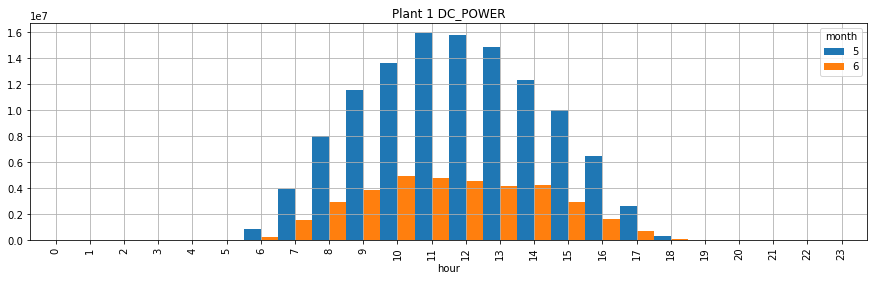

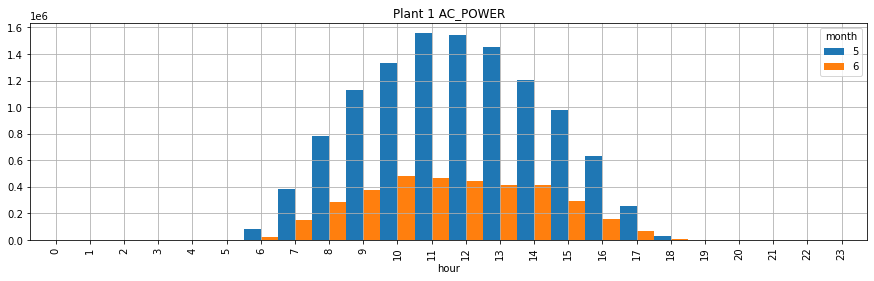

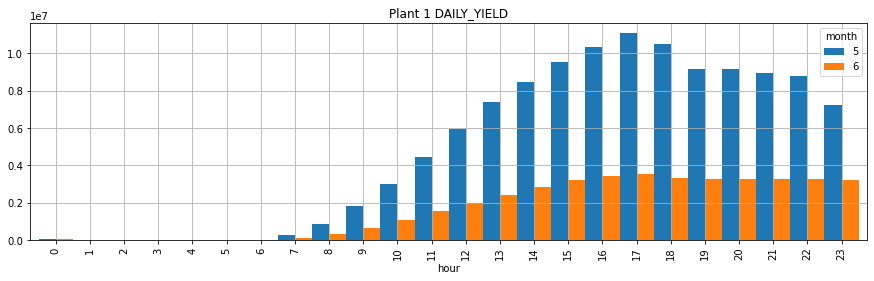

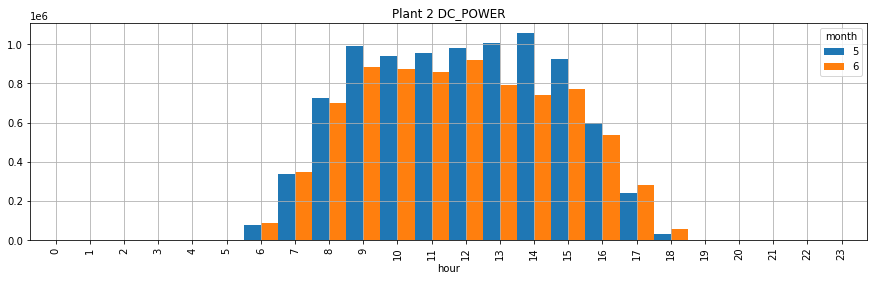

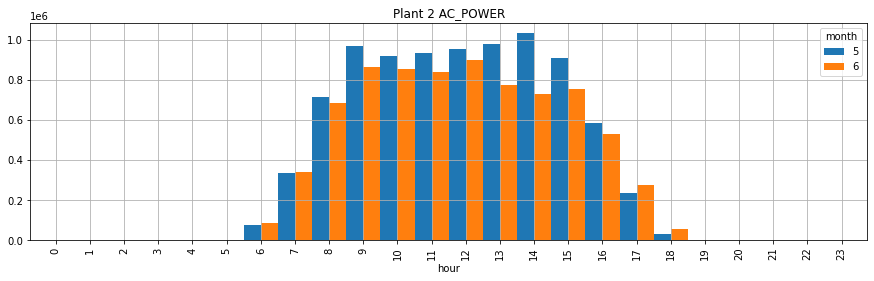

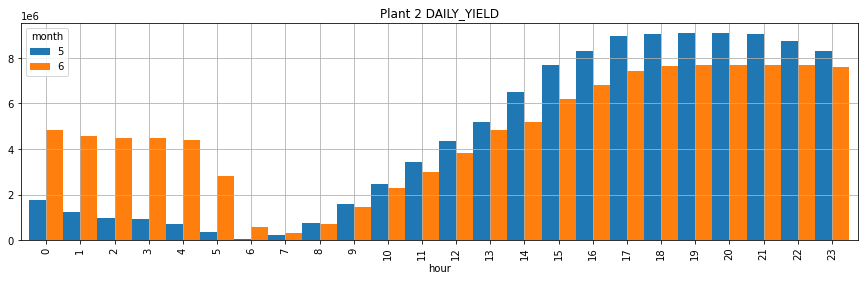

In [23]:
#plot_by_hour return bar plot of given column w.r.t hour and month
#each bar represent hour wise total power ganeration. 

#plant 1
def plot_by_hour(data, val = None, agg = 'sum'):
    dd = data
    by_hour = dd.groupby(['hour','month'])[val].agg(agg).unstack()
    return by_hour.plot(kind='bar', figsize=(15,4),width=1,grid=True,title='Plant 1'+' '+val,legend=True)

plot_by_hour(p1_gen,'DC_POWER') 
plot_by_hour(p1_gen,'AC_POWER')
plot_by_hour(p1_gen,'DAILY_YIELD') 


#plant 2
def plot_by_hour(data, val = None, agg = 'sum'):
    dd = data
    by_hour = dd.groupby(['hour','month'])[val].agg(agg).unstack()
    return by_hour.plot(kind='bar', figsize=(15,4),width=1,grid=True,title='Plant 2'+' '+val,legend=True)

plot_by_hour(p2_gen,'DC_POWER') 
plot_by_hour(p2_gen,'AC_POWER')
plot_by_hour(p2_gen,'DAILY_YIELD') 


'Comparison of DC power generation'

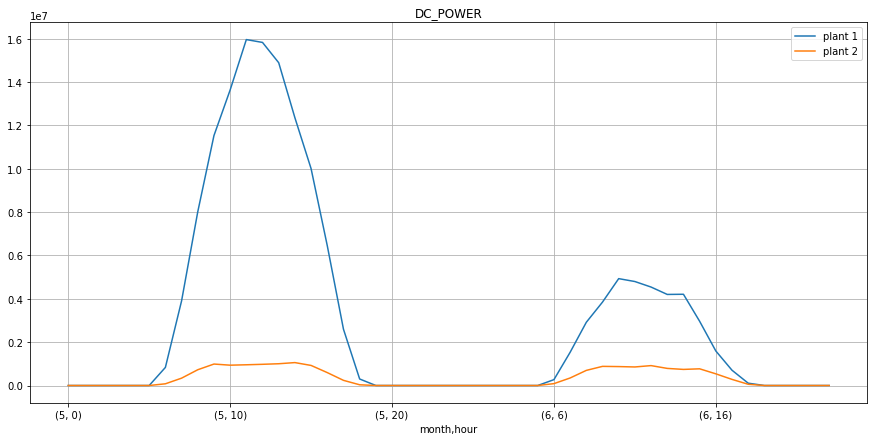

In [24]:
#DC power comparison 
def line_plot(data, col=None, agg = 'sum'):
    dd = data
    hours = dd.groupby(['month',"hour"])[col].agg(agg)
    ax = hours.plot(kind="line", figsize=(15,7),title=col, grid =True, legend=True) 
    ax.legend(["plant 1", "plant 2"]);
    return ("Comparison of DC power generation")

line_plot(p1_gen,'DC_POWER')
line_plot(p2_gen,'DC_POWER')

'Comparison of AC power generation'

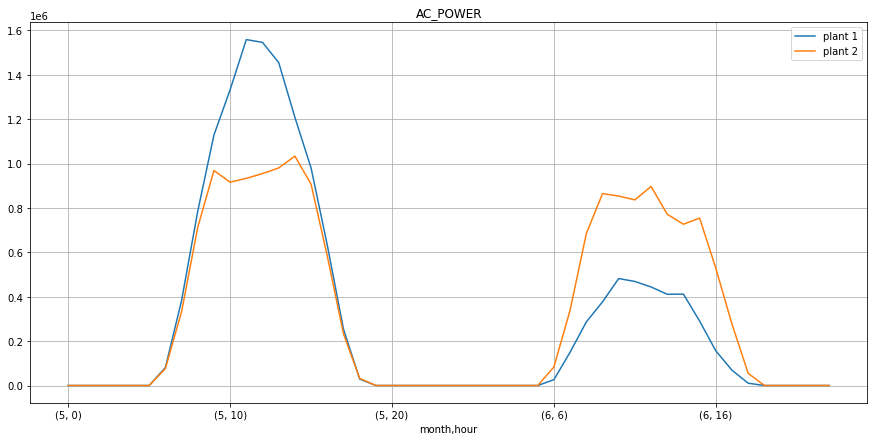

In [25]:
#AC power comparison 
def line_plot(data, col=None, agg = 'sum'):
    dd = data
    hours = dd.groupby(['month',"hour"])[col].agg(agg)
    ax = hours.plot(kind="line", figsize=(15,7),title=col, grid =True, legend=True) 
    ax.legend(["plant 1", "plant 2"]);
    return "Comparison of AC power generation"

line_plot(p1_gen,'AC_POWER')
line_plot(p2_gen,'AC_POWER')

'Daily yeild comparison'

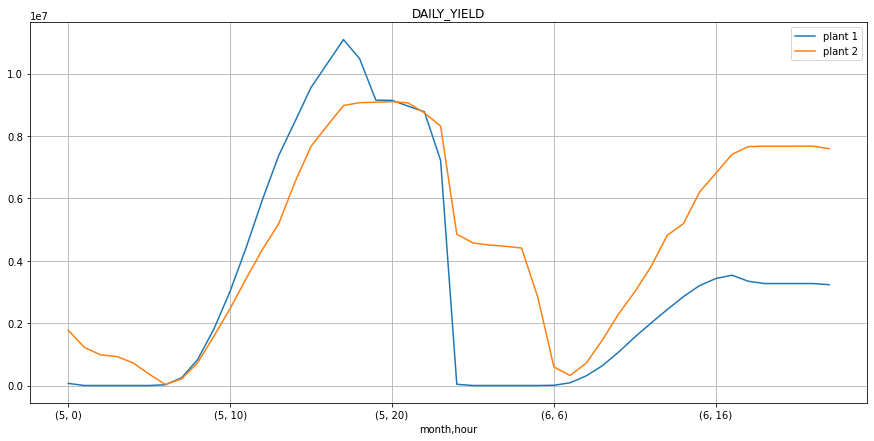

In [26]:
#Daily yeild comparison between plant 1 and 2
def line_plot(data, col=None, agg = 'sum'):
    dd = data
    hours = dd.groupby(['month',"hour"])[col].agg(agg)
    ax = hours.plot(kind="line", figsize=(15,7),title=col, grid =True, legend=True) 
    ax.legend(["plant 1", "plant 2"]);
    return 'Daily yeild comparison'

line_plot(p1_gen,'DAILY_YIELD')
line_plot(p2_gen,'DAILY_YIELD') 

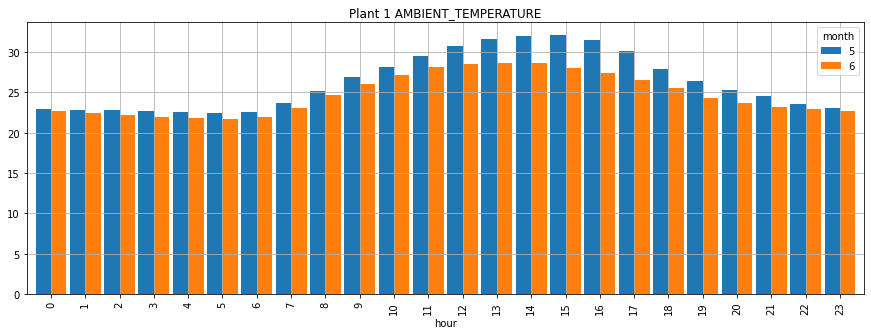

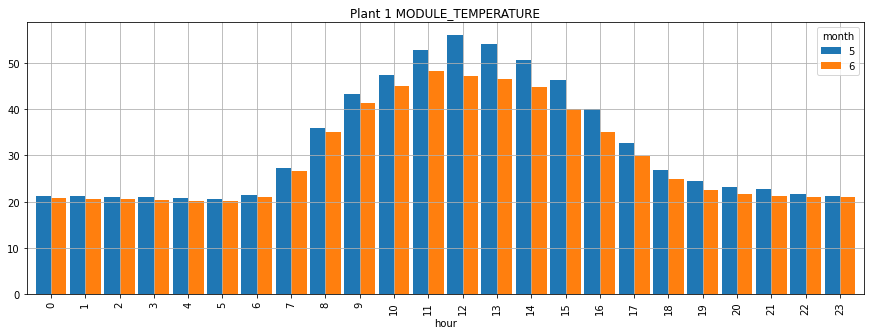

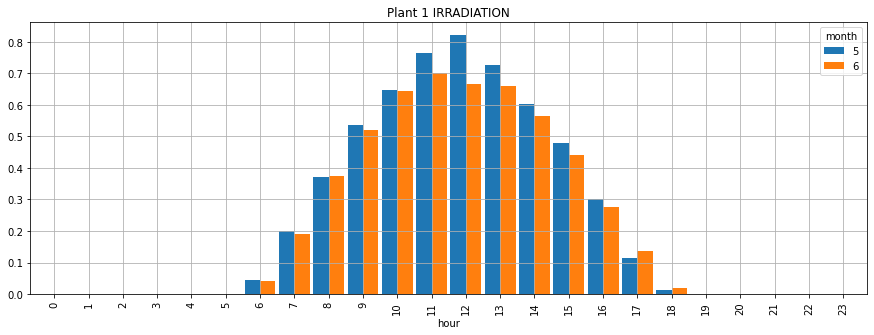

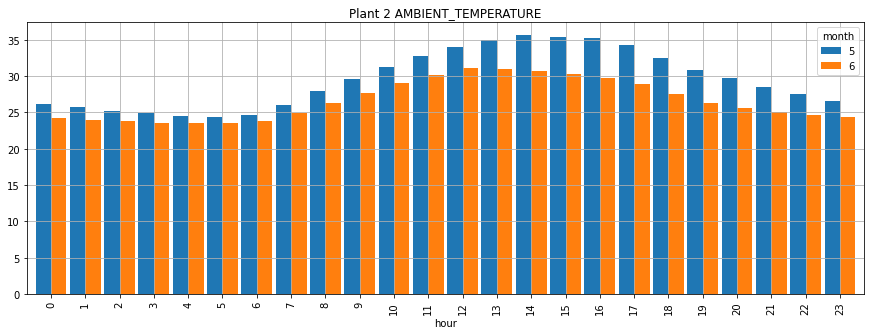

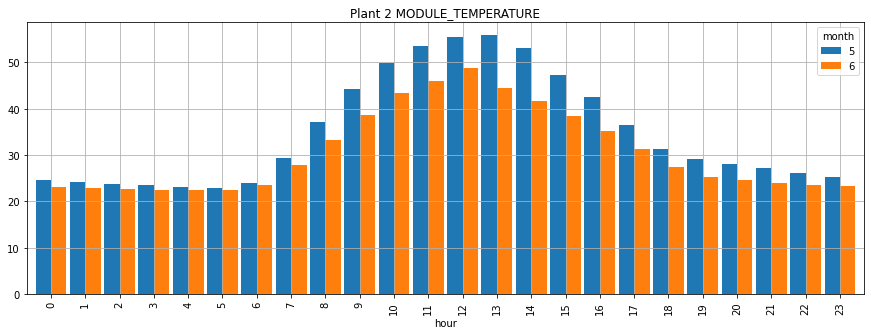

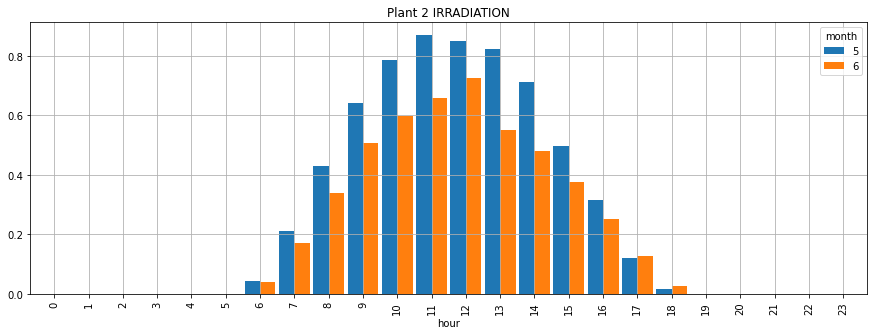

In [27]:
#hour wise 5th and 6th month comparison of ambient temparature and module temparature. 

#plant 1
def func(data, val = None, agg = 'mean'):
    dd=data
    by_hr = dd.groupby(['hour','month'])[val].agg(agg).unstack()
    return by_hr.plot(kind='bar',figsize=(15,5),width=0.9,grid=True,title='Plant 1'+" "+val)

func(p1_whe,'AMBIENT_TEMPERATURE')
func(p1_whe,'MODULE_TEMPERATURE')
func(p1_whe,'IRRADIATION')

#plant 2
def func(data, val = None, agg = 'mean'):
    dd=data
    by_hr = dd.groupby(['hour','month'])[val].agg(agg).unstack()
    return by_hr.plot(kind='bar',figsize=(15,5),width=0.9,grid=True,title='Plant 2'+" "+val)

func(p2_whe,'AMBIENT_TEMPERATURE')
func(p2_whe,'MODULE_TEMPERATURE')
func(p2_whe,'IRRADIATION')

'Irradiation comparison'

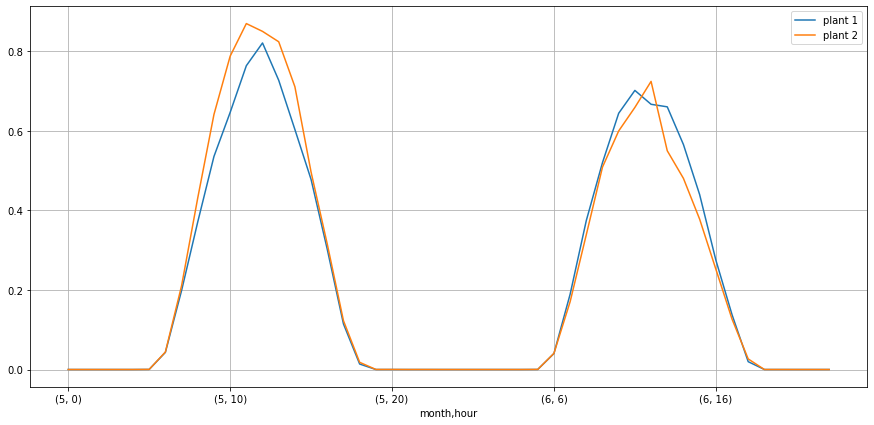

In [28]:
#irradiation comparison between plant 1 and plant 2 

def line_plot(data, col=None, agg = 'mean'):
    dd = data
    hours = dd.groupby(['month',"hour"])[col].agg(agg)
    ax = hours.plot(kind="line", figsize=(15,7), grid =True, legend=True) 
    ax.legend(['plant 1','plant 2'])
    return 'Irradiation comparison'

line_plot(p1_whe,'IRRADIATION')
line_plot(p2_whe,'IRRADIATION')

'Ambient temperature comparison'

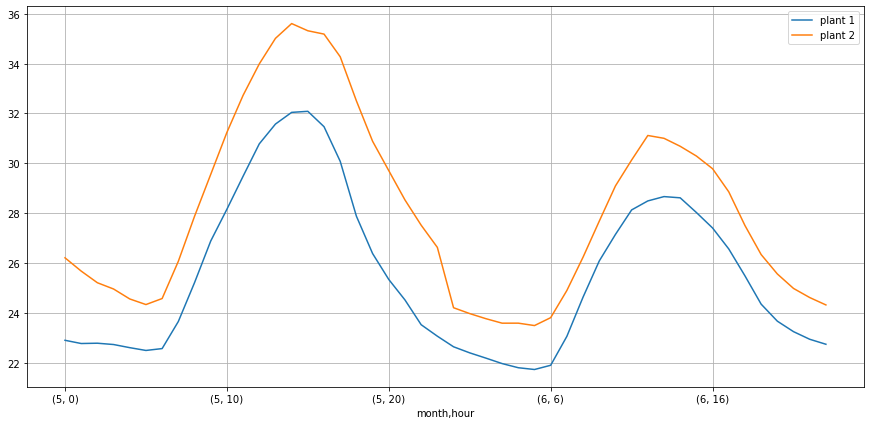

In [29]:
#AMBIENT TEMPERATURE comparison between plant 1 and plant 2 

def line_plot(data, col=None, agg = 'mean'):
    dd = data
    hours = dd.groupby(['month',"hour"])[col].agg(agg)
    ax = hours.plot(kind="line", figsize=(15,7), grid =True, legend=True) 
    ax.legend(['plant 1','plant 2'])
    return 'Ambient temperature comparison'

line_plot(p1_whe,'AMBIENT_TEMPERATURE')
line_plot(p2_whe,'AMBIENT_TEMPERATURE')

'Module temperature comparision'

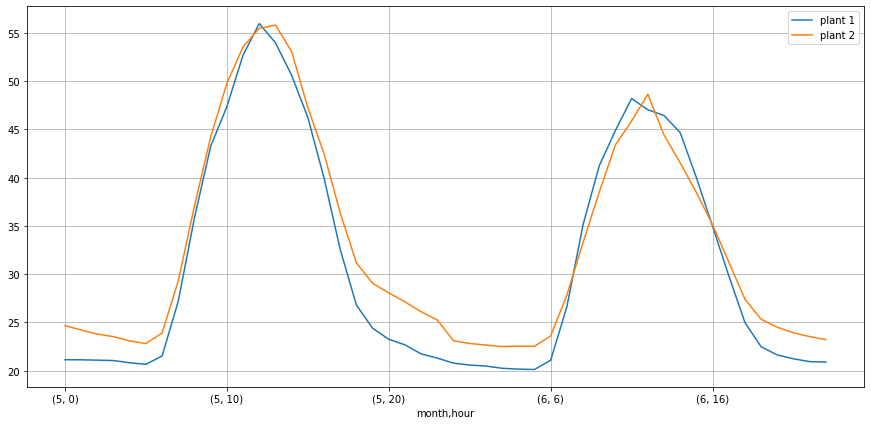

In [30]:
#MODULE TEMPERATURE comparison between plant 1 and plant 2 

def line_plot(data, col=None, agg = 'mean'):
    dd = data
    hours = dd.groupby(['month',"hour"])[col].agg(agg)
    ax = hours.plot(kind="line", figsize=(15,7), grid =True, legend=True) 
    ax.legend(['plant 1','plant 2'])
    return 'Module temperature comparision'

line_plot(p1_whe,'MODULE_TEMPERATURE')
line_plot(p2_whe,'MODULE_TEMPERATURE')

In [31]:
#Total irradiation per day

#plant 1
irr_per_day_p1 = pd.DataFrame(p1_whe.groupby(['month',"day"])['IRRADIATION'].agg('sum'))
irr_per_day_p1

IRRADIATION
month day             
5     15     19.037010
      16     18.651690
      17     22.931378
      18     15.266485
      19     18.044861
      20     18.245542
      21     23.556170
      22     22.119123
      23     26.106652
      24     24.937180
      25     27.233366
      26     24.250589
      27     20.537566
      28     26.032384
      29     24.795661
      30     21.875054
      31     17.625458
6     1      17.649244
      2      21.483649
      3      21.927709
      4      24.670974
      5      23.192659
      6      19.526878
      7      24.402373
      8      25.315527
      9      24.754673
      10     19.232292
      11     15.533706
      12     16.301551
      13     25.389355
      14     21.128221
      15     19.768806
      16     17.979125
      17     16.988513

In [32]:
#plant 1
irr_per_day_p2 = pd.DataFrame(p2_whe.groupby(['month',"day"])['IRRADIATION'].agg('sum'))
irr_per_day_p2

IRRADIATION
month day             
5     15     28.559055
      16     23.676573
      17     21.233595
      18     21.495780
      19     20.345321
      20     26.786871
      21     27.191185
      22     28.535843
      23     28.159981
      24     27.426044
      25     26.556925
      26     27.234674
      27     27.431939
      28     28.137027
      29     23.237209
      30     23.826997
      31     19.203960
6     1      13.430264
      2      23.748618
      3      16.614638
      4      20.182779
      5      22.366602
      6      25.963741
      7      25.034945
      8      27.038444
      9      23.838025
      10     18.576323
      11     11.277962
      12     13.102966
      13     20.690174
      14     22.033630
      15     17.765047
      16     15.845917
      17     11.940765

In [33]:
#max ambient and module temperature

print(' Maximum ambient temparature (plant 1): ',max(p1_whe.AMBIENT_TEMPERATURE),'\n','Maximum module temparature (plant 1): ',max(p1_whe.MODULE_TEMPERATURE))
print(' Maximum ambient temparature (plant 2): ',max(p2_whe.AMBIENT_TEMPERATURE),'\n','Maximum module temparature (plant 2): ',max(p2_whe.MODULE_TEMPERATURE))

 Maximum ambient temparature (plant 1):  35.25248613333334 
 Maximum module temparature (plant 1):  65.54571366666664
 Maximum ambient temparature (plant 2):  39.18163776666667 
 Maximum module temparature (plant 2):  66.6359527586207


In [34]:
#number of inverters in each plant

print(' Inverter in plant 1:',len(p1_gen.SOURCE_KEY.unique()),'\n','Inverter in plant 2:',len(p2_gen.SOURCE_KEY.unique()))

 Inverter in plant 1: 22 
 Inverter in plant 2: 22


In [35]:
#DC/AC ratio of plant 1
p1_gen['DC/AC'] = p1_gen.DC_POWER/p1_gen.AC_POWER
p1_gen.fillna(0,inplace=True)

#DC/AC ratio of plant 2
p2_gen['DC/AC'] = p2_gen.DC_POWER/p2_gen.AC_POWER
p2_gen.fillna(0,inplace=True)

In [36]:
#plant 1
p1_gen.sort_values(by='DC/AC',ascending=False).reset_index(drop=True).head()

SOURCE_KEY      DC_POWER     AC_POWER  DAILY_YIELD  TOTAL_YIELD  day  \
0  1IF53ai7Xc0U56Y  11413.250000  1090.557143  4384.285714  6237631.286   22   
1  zVJPv84UY57bAof     26.000000     2.485714     0.000000  7336960.000   14   
2  adLQvlD726eNBSB  11439.500000  1093.771429  4435.000000  6326008.000   22   
3  rGa61gmuvPhdLxV      8.875000     0.850000  5365.000000  7136902.000   18   
4  1IF53ai7Xc0U56Y     24.428571     2.342857  6846.000000  6421214.000   15   

   month  hour  minute      DC/AC  
0      5    13       0  10.465522  
1      6     6       0  10.459770  
2      5    13       0  10.458767  
3      5    18      30  10.441176  
4      6    18      30  10.426829

In [37]:
#plant 2
p2_gen.sort_values(by='DC/AC',ascending=False).reset_index(drop=True).head()

SOURCE_KEY    DC_POWER    AC_POWER  DAILY_YIELD   TOTAL_YIELD  day  \
0  xoJJ8DcxJEcupym  824.585714  752.673333  1628.866667  2.092125e+08   27   
1  LYwnQax7tkwH5Cb    0.285714    0.271429     0.000000  1.795051e+09    2   
2  Mx2yZCDsyf6DPfv    0.671429    0.642857  7340.000000  2.597257e+06    2   
3  Qf4GUc1pJu5T6c6    0.473333    0.453333  9156.000000  8.385045e+08   25   
4  4UPUqMRk7TRMgml    1.357143    1.300000  5588.000000  2.624287e+06   11   

   month  hour  minute     DC/AC  
0      5    14      45  1.095543  
1      6     5      45  1.052632  
2      6    18      45  1.044444  
3      5    18      15  1.044118  
4      6     6       0  1.043956

In [38]:
#Plant 1 inverter rank(DC to AC conversion)
inverter_rank_p1 = pd.DataFrame(p1_gen.groupby('SOURCE_KEY')['DC/AC'].agg('max'))
inverter_rank_p1.sort_values(by='DC/AC',ascending=False)

DC/AC
SOURCE_KEY                
1IF53ai7Xc0U56Y  10.465522
zVJPv84UY57bAof  10.459770
adLQvlD726eNBSB  10.458767
rGa61gmuvPhdLxV  10.441176
1BY6WEcLGh8j5v7  10.425532
ZnxXDlPa8U1GXgE  10.425532
McdE0feGgRqW7Ca  10.424837
YxYtjZvoooNbGkE  10.424242
uHbuxQJl8lW7ozc  10.422535
z9Y9gH1T5YWrNuG  10.421053
ZoEaEvLYb1n2sOq  10.414938
iCRJl6heRkivqQ3  10.413534
7JYdWkrLSPkdwr4  10.413386
ih0vzX44oOqAx2f  10.410959
3PZuoBAID5Wc2HD  10.408163
WRmjgnKYAwPKWDb  10.406977
sjndEbLyjtCKgGv  10.406504
zBIq5rxdHJRwDNY  10.405405
bvBOhCH3iADSZry  10.400000
VHMLBKoKgIrUVDU  10.398010
wCURE6d3bPkepu2  10.394737
pkci93gMrogZuBj  10.389105

In [39]:
#plant 2
inverter_rank_p2 = pd.DataFrame(p2_gen.groupby('SOURCE_KEY')['DC/AC'].agg('max'))
inverter_rank_p2.sort_values(by='DC/AC',ascending=False)

DC/AC
SOURCE_KEY               
xoJJ8DcxJEcupym  1.095543
LYwnQax7tkwH5Cb  1.052632
Mx2yZCDsyf6DPfv  1.044444
Qf4GUc1pJu5T6c6  1.044118
4UPUqMRk7TRMgml  1.043956
9kRcWv60rDACzjR  1.043478
WcxssY2VbP4hApt  1.042857
oZZkBaNadn6DNKz  1.042254
rrq4fwE8jgrTyWY  1.042169
q49J1IKaHRwDQnt  1.042105
oZ35aAeoifZaQzV  1.041667
NgDl19wMapZy17u  1.041667
xMbIugepa2P7lBB  1.041667
Et9kgGMDl729KT4  1.041451
81aHJ1q11NBPMrL  1.041176
V94E5Ben1TlhnDV  1.041096
IQ2d7wF4YD8zU1Q  1.040650
PeE6FRyGXUgsRhN  1.040541
Quc1TzYxW2pYoWX  1.040541
mqwcsP2rE7J0TFp  1.040462
LlT2YUhhzqhg5Sw  1.040462
vOuJvMaM2sgwLmb  1.040367

In [40]:
#rank the inverter based on DC power generation for plant 1
inv_rank_by_dc_p2 = pd.DataFrame(p1_gen.groupby('SOURCE_KEY')['DC_POWER'].agg('sum'))
inv_rank_by_dc_p2.sort_values(by='DC_POWER',ascending=False)

DC_POWER
SOURCE_KEY                   
adLQvlD726eNBSB  7.196892e+06
VHMLBKoKgIrUVDU  7.116923e+06
1IF53ai7Xc0U56Y  7.106997e+06
McdE0feGgRqW7Ca  7.103972e+06
3PZuoBAID5Wc2HD  7.082676e+06
ZnxXDlPa8U1GXgE  7.053295e+06
wCURE6d3bPkepu2  7.041953e+06
uHbuxQJl8lW7ozc  7.040973e+06
iCRJl6heRkivqQ3  7.038573e+06
zVJPv84UY57bAof  7.011392e+06
z9Y9gH1T5YWrNuG  6.977498e+06
pkci93gMrogZuBj  6.973641e+06
sjndEbLyjtCKgGv  6.966268e+06
rGa61gmuvPhdLxV  6.964323e+06
YxYtjZvoooNbGkE  6.961325e+06
WRmjgnKYAwPKWDb  6.942840e+06
7JYdWkrLSPkdwr4  6.941605e+06
ZoEaEvLYb1n2sOq  6.914724e+06
zBIq5rxdHJRwDNY  6.890611e+06
ih0vzX44oOqAx2f  6.830529e+06
1BY6WEcLGh8j5v7  6.440464e+06
bvBOhCH3iADSZry  6.347999e+06

In [41]:
#rank the inverter based on AC power generation
inv_rank_by_ac_p1 = pd.DataFrame(p1_gen.groupby('SOURCE_KEY')['AC_POWER'].agg('sum'))
inv_rank_by_ac_p1.sort_values(by='AC_POWER',ascending=False)

AC_POWER
SOURCE_KEY                    
adLQvlD726eNBSB  703657.518330
VHMLBKoKgIrUVDU  695883.508496
1IF53ai7Xc0U56Y  694910.924882
McdE0feGgRqW7Ca  694711.096791
3PZuoBAID5Wc2HD  692543.836071
ZnxXDlPa8U1GXgE  689706.788809
wCURE6d3bPkepu2  688584.465832
uHbuxQJl8lW7ozc  688496.596864
iCRJl6heRkivqQ3  688266.892503
zVJPv84UY57bAof  685608.441666
z9Y9gH1T5YWrNuG  682307.909644
pkci93gMrogZuBj  681936.813570
sjndEbLyjtCKgGv  681317.651428
rGa61gmuvPhdLxV  681041.157740
YxYtjZvoooNbGkE  680730.248448
WRmjgnKYAwPKWDb  678928.261550
7JYdWkrLSPkdwr4  678815.885672
ZoEaEvLYb1n2sOq  676193.875595
zBIq5rxdHJRwDNY  673878.504046
ih0vzX44oOqAx2f  668008.671433
1BY6WEcLGh8j5v7  629996.871186
bvBOhCH3iADSZry  621022.621310

In [42]:
#rank the inverter based on DC power generation for plant 2
inv_rank_by_dc_p2 = pd.DataFrame(p2_gen.groupby('SOURCE_KEY')['DC_POWER'].agg('sum'))
inv_rank_by_dc_p2.sort_values(by='DC_POWER',ascending=False)

DC_POWER
SOURCE_KEY                    
Mx2yZCDsyf6DPfv  910617.270808
Qf4GUc1pJu5T6c6  890596.324322
4UPUqMRk7TRMgml  887444.875348
oZ35aAeoifZaQzV  885151.874261
V94E5Ben1TlhnDV  854375.668930
vOuJvMaM2sgwLmb  854172.894243
oZZkBaNadn6DNKz  834046.999676
PeE6FRyGXUgsRhN  810478.778457
LlT2YUhhzqhg5Sw  800062.652611
WcxssY2VbP4hApt  799350.243035
9kRcWv60rDACzjR  797324.213511
xoJJ8DcxJEcupym  785180.932443
81aHJ1q11NBPMrL  752165.196310
q49J1IKaHRwDQnt  737061.896822
rrq4fwE8jgrTyWY  681647.365682
IQ2d7wF4YD8zU1Q  672411.639080
xMbIugepa2P7lBB  661077.859235
mqwcsP2rE7J0TFp  649276.918105
NgDl19wMapZy17u  644144.508733
LYwnQax7tkwH5Cb  639696.326687
Et9kgGMDl729KT4  601396.050982
Quc1TzYxW2pYoWX  553548.858901

In [43]:
#rank the inverter based on AC power generation
inv_rank_by_ac_p2 = pd.DataFrame(p2_gen.groupby('SOURCE_KEY')['AC_POWER'].agg('sum'))
inv_rank_by_ac_p2.sort_values(by='AC_POWER',ascending=False)

AC_POWER
SOURCE_KEY                    
Mx2yZCDsyf6DPfv  890317.270321
Qf4GUc1pJu5T6c6  870755.655462
4UPUqMRk7TRMgml  867688.151550
oZ35aAeoifZaQzV  865435.791964
V94E5Ben1TlhnDV  835443.639984
vOuJvMaM2sgwLmb  835012.155241
oZZkBaNadn6DNKz  815637.897502
PeE6FRyGXUgsRhN  792664.868701
LlT2YUhhzqhg5Sw  782521.577770
WcxssY2VbP4hApt  781608.549098
9kRcWv60rDACzjR  779819.329933
xoJJ8DcxJEcupym  767932.701010
81aHJ1q11NBPMrL  735648.671081
q49J1IKaHRwDQnt  721060.844115
rrq4fwE8jgrTyWY  667002.354956
IQ2d7wF4YD8zU1Q  657492.579189
xMbIugepa2P7lBB  646458.728993
mqwcsP2rE7J0TFp  634944.647197
NgDl19wMapZy17u  629927.405301
LYwnQax7tkwH5Cb  626022.753183
Et9kgGMDl729KT4  588615.708104
Quc1TzYxW2pYoWX  542014.929794

# Observations:- 
1. Powerplant at its best during 10 to 14 everyday, specially during MAY.
2. Mean temparature and irradiation higher in 5th month during each hour.
3. Power generation during 5th month is much higher than 6th.
4. Plant 1 ganerate more DC power than plant 2.
5. Ambient temparature higher in plant 2.
6. Plant 2 has higher DC to AC convertion than plant 1.